In [46]:
import cv2 as cv
import numpy as np
import scipy
import pickle
import random
import os
import matplotlib.pyplot as plt


In [47]:
img_path="/Users/maddisiddart/Desktop/images/3232.png"

In [48]:
img=cv.imread(img_path)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)


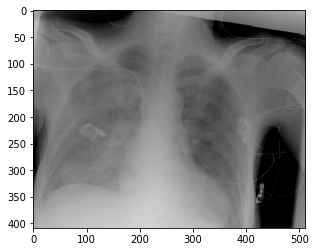

In [49]:
plt.imshow(img)

In [50]:
sift = cv.xfeatures2d.SIFT_create()


In [51]:
keypoints=sift.detect(gray)

In [52]:
img1=cv.drawKeypoints(gray,keypoints,img)

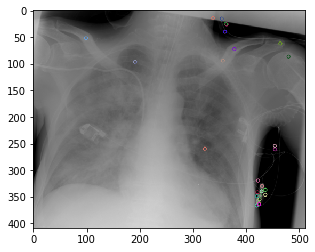

In [53]:
plt.imshow(img1)

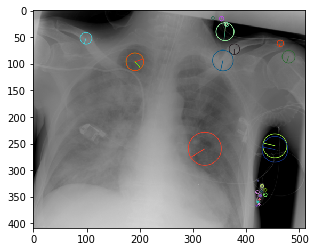

In [54]:
img1=cv.drawKeypoints(gray,keypoints,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img1)

In [55]:
kps = sorted(keypoints, key=lambda x: -x.response)[:32]


In [56]:
len(kps)

31

In [57]:
kps, dsc = sift.compute(img, kps)


In [62]:
type(dsc)

numpy.ndarray

In [59]:
dsc

array([[  0.,   0.,   0., ...,  43.,  30.,   6.],
       [ 20.,  42.,  32., ...,   0.,   0.,   9.],
       [ 52., 111.,  18., ..., 116.,   1.,   0.],
       ...,
       [ 72.,  18.,   0., ...,   0.,   0.,   0.],
       [  4.,   1.,   0., ...,   0.,   0.,   6.],
       [  8.,   4.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [64]:
X=[]
for d in dsc:
    X.append(d)

In [67]:
type(X[0])

numpy.ndarray

In [68]:
X

[array([  0.,   0.,   0.,  10.,  29.,   0.,   0.,   0.,  27.,  12.,   3.,
         81., 159.,   1.,   0.,   1., 159.,  48.,   3.,  13.,  40.,   0.,
          0.,   7.,  38.,   5.,   2.,   3.,   1.,   2.,   9.,  13.,   0.,
          0.,   0.,   4.,  20.,   1.,   0.,   0.,  37.,   7.,   1.,  33.,
        159.,  61.,   3.,  10., 159.,  21.,   1.,   5.,  52.,  20.,   3.,
         63.,  59.,   1.,   5.,  30.,  38.,   3.,   3.,  24.,   0.,   0.,
          0.,   0.,   4.,   3.,   0.,   0.,   7.,   0.,   0.,   0., 126.,
        159.,  58.,  28., 125.,   1.,   1.,   4.,  22.,  56.,  77., 159.,
         25.,   1.,   1.,  35.,  70.,  16.,   5.,  14.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   5.,  14.,  98.,
         30.,   3.,   1.,   0.,   1.,   8.,  20.,  66.,  56.,  22.,   1.,
          2.,   2.,   6.,  18.,  43.,  30.,   6.], dtype=float32),
 array([ 20.,  42.,  32.,   5.,   1.,   1.,   2.,   7.,  21.,  63.,  53.,
         21.,   1.,   0.,   1.,   8.,  17., 1

In [69]:
dsc

array([[  0.,   0.,   0., ...,  43.,  30.,   6.],
       [ 20.,  42.,  32., ...,   0.,   0.,   9.],
       [ 52., 111.,  18., ..., 116.,   1.,   0.],
       ...,
       [ 72.,  18.,   0., ...,   0.,   0.,   0.],
       [  4.,   1.,   0., ...,   0.,   0.,   6.],
       [  8.,   4.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [31]:
dsc.size

3968

In [70]:
a=[]
for i in range(0,10):
    a.append([])
    a[-1].append(dsc)
    


In [71]:
a

[[array([[  0.,   0.,   0., ...,  43.,  30.,   6.],
         [ 20.,  42.,  32., ...,   0.,   0.,   9.],
         [ 52., 111.,  18., ..., 116.,   1.,   0.],
         ...,
         [ 72.,  18.,   0., ...,   0.,   0.,   0.],
         [  4.,   1.,   0., ...,   0.,   0.,   6.],
         [  8.,   4.,   0., ...,   0.,   0.,   0.]], dtype=float32)],
 [array([[  0.,   0.,   0., ...,  43.,  30.,   6.],
         [ 20.,  42.,  32., ...,   0.,   0.,   9.],
         [ 52., 111.,  18., ..., 116.,   1.,   0.],
         ...,
         [ 72.,  18.,   0., ...,   0.,   0.,   0.],
         [  4.,   1.,   0., ...,   0.,   0.,   6.],
         [  8.,   4.,   0., ...,   0.,   0.,   0.]], dtype=float32)],
 [array([[  0.,   0.,   0., ...,  43.,  30.,   6.],
         [ 20.,  42.,  32., ...,   0.,   0.,   9.],
         [ 52., 111.,  18., ..., 116.,   1.,   0.],
         ...,
         [ 72.,  18.,   0., ...,   0.,   0.,   0.],
         [  4.,   1.,   0., ...,   0.,   0.,   6.],
         [  8.,   4.,   0., ...,   0.,

In [77]:
a[0]

[array([[  0.,   0.,   0., ...,  43.,  30.,   6.],
        [ 20.,  42.,  32., ...,   0.,   0.,   9.],
        [ 52., 111.,  18., ..., 116.,   1.,   0.],
        ...,
        [ 72.,  18.,   0., ...,   0.,   0.,   0.],
        [  4.,   1.,   0., ...,   0.,   0.,   6.],
        [  8.,   4.,   0., ...,   0.,   0.,   0.]], dtype=float32)]

In [78]:
a[0][0]

array([[  0.,   0.,   0., ...,  43.,  30.,   6.],
       [ 20.,  42.,  32., ...,   0.,   0.,   9.],
       [ 52., 111.,  18., ..., 116.,   1.,   0.],
       ...,
       [ 72.,  18.,   0., ...,   0.,   0.,   0.],
       [  4.,   1.,   0., ...,   0.,   0.,   6.],
       [  8.,   4.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [76]:
np.asarray(a[i][0],np.float32)

array([[  0.,   0.,   0., ...,  43.,  30.,   6.],
       [ 20.,  42.,  32., ...,   0.,   0.,   9.],
       [ 52., 111.,  18., ..., 116.,   1.,   0.],
       ...,
       [ 72.,  18.,   0., ...,   0.,   0.,   0.],
       [  4.,   1.,   0., ...,   0.,   0.,   6.],
       [  8.,   4.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [37]:
a[-1].append(dsc)

In [38]:
a

[[5], [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]]

In [39]:
a[1][0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [43]:
b=np.asarray(a[1][0],np.float32)

In [44]:
b

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [42]:
b[0]

0.0

In [45]:
for d in dsc:
    print(d)

0.0
0.0
0.0
10.0
28.0
0.0
0.0
0.0
25.0
15.0
4.0
82.0
158.0
1.0
0.0
1.0
158.0
65.0
5.0
14.0
34.0
0.0
0.0
8.0
28.0
6.0
3.0
4.0
2.0
2.0
9.0
13.0
0.0
0.0
0.0
4.0
19.0
1.0
0.0
0.0
44.0
10.0
1.0
41.0
158.0
44.0
3.0
5.0
158.0
28.0
1.0
7.0
54.0
13.0
4.0
43.0
51.0
1.0
5.0
29.0
36.0
3.0
3.0
19.0
0.0
0.0
0.0
0.0
4.0
3.0
0.0
0.0
10.0
0.0
0.0
0.0
130.0
158.0
63.0
27.0
146.0
2.0
0.0
4.0
23.0
56.0
84.0
158.0
27.0
1.0
1.0
32.0
67.0
15.0
4.0
11.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
5.0
13.0
94.0
30.0
3.0
1.0
0.0
1.0
8.0
19.0
63.0
55.0
22.0
1.0
1.0
2.0
6.0
17.0
41.0
29.0
6.0
19.0
40.0
30.0
5.0
1.0
1.0
1.0
6.0
20.0
60.0
52.0
21.0
1.0
0.0
1.0
7.0
17.0
98.0
29.0
3.0
0.0
0.0
1.0
6.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
66.0
12.0
3.0
11.0
26.0
1.0
1.0
37.0
24.0
52.0
83.0
155.0
142.0
1.0
1.0
4.0
138.0
155.0
63.0
28.0
9.0
0.0
0.0
0.0
4.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
29.0
3.0
3.0
23.0
52.0
0.0
5.0
27.0
60.0
11.0
4.0
52.0
155.0
18.0
1.0
10.0
155.0
34.0
3.0
6.0
40.0
7.0
1.0
52.0
14.0
1.0
0.0
0.0
0.0
0.0
0.0
4.0

0.0
0.0
1.0
68.0
137.0
9.0
0.0
0.0
0.0
0.0
6.0
38.0
12.0
2.0
0.0
0.0
0.0
1.0
17.0
27.0
1.0
5.0
90.0
45.0
0.0
0.0
0.0
0.0
149.0
36.0
36.0
12.0
0.0
0.0
0.0
10.0
149.0
8.0
0.0
0.0
0.0
0.0
0.0
20.0
19.0
9.0
0.0
0.0
0.0
0.0
0.0
0.0
13.0
51.0
138.0
8.0
0.0
0.0
0.0
0.0
149.0
63.0
24.0
1.0
0.0
0.0
0.0
17.0
149.0
39.0
0.0
0.0
0.0
0.0
0.0
11.0
14.0
28.0
1.0
0.0
0.0
0.0
0.0
0.0
49.0
32.0
35.0
1.0
1.0
22.0
11.0
29.0
149.0
38.0
5.0
0.0
0.0
0.0
3.0
112.0
110.0
58.0
0.0
0.0
0.0
0.0
3.0
18.0
7.0
42.0
5.0
0.0
0.0
0.0
0.0
1.0
49.0
1.0
0.0
0.0
0.0
9.0
27.0
140.0
149.0
1.0
1.0
1.0
1.0
3.0
15.0
149.0
19.0
5.0
1.0
3.0
4.0
13.0
24.0
34.0
7.0
6.0
1.0
0.0
0.0
0.0
1.0
8.0
13.0
7.0
2.0
92.0
150.0
0.0
0.0
0.0
150.0
29.0
3.0
17.0
23.0
0.0
0.0
7.0
100.0
6.0
0.0
0.0
0.0
0.0
2.0
22.0
6.0
1.0
0.0
0.0
0.0
2.0
11.0
8.0
33.0
4.0
0.0
60.0
150.0
8.0
0.0
1.0
150.0
14.0
0.0
8.0
24.0
2.0
0.0
35.0
97.0
4.0
0.0
0.0
0.0
1.0
14.0
58.0
7.0
2.0
1.0
4.0
2.0
3.0
8.0
5.0
21.0
0.0
0.0
18.0
150.0
27.0
7.0
17.0
150.0
14.0
0.0
1.0
18.0
5.

In [85]:
dsc.shape

(31, 128)

In [87]:
len(kps)

31

In [107]:
d=[[1,3,1,4,2,2,1,7],[1,2,3]]
np.where(np.array(d)<4)

TypeError: '<' not supported between instances of 'list' and 'int'

(array([0]),)

In [92]:
set(d)

{1, 3, 4, 5, 7}

In [110]:
a = np.array([[1, 2, 3], [4, 5, 6],[2,2,6]]) 
  
print(a) 
  
print ('Indices of elements <4') 
  
b = np.where(a==2) 
print(b) 

[[1 2 3]
 [4 5 6]
 [2 2 6]]
Indices of elements <4
(array([0, 2, 2]), array([1, 0, 1]))


In [111]:
h=[0]*100

In [112]:
h

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]